In [1]:
# 9,CongestionWindow
# 17,SmoothedRTT
# 20,RetransmissionTimeout
# 21,SocketSendBufferSize
# 22,SocketSendBufferBytes
# 23,SocketReceiveBufferSize
# 24,SocketReceiveBufferBytes
# 25,UnacknowledgedBytes

# # With ECN and no ECN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import matplotlib.pyplot as plt
# from gym import wrappers
# from gym import spaces
import math
import random
import re
import os
import sys
import seaborn as sns

# import gym
# import tensorflow as tf
# from tensorflow.keras import layers
col = ['Direction', 'Hash', 'Time', 'LocalIP', 'LocalPort', 'ForeignIP', 'ForeignPort', 'SlowStartThreshold', 'CongestionWindow', 'BandwidthControlledWindow', 'SendingWindow', 'ReceiveWindow', 'SendingWindowScalingFactor', 'ReceiveWindowScalingFactor', 'TCPFiniteStateMachine',
       'MaximumSegmentSize', 'SmoothedRTT', 'SACKEnabled', 'TCPFlags', 'RetransmissionTimeout', 'SocketSendBufferSize', 'SocketSendBufferBytes', 'SocketReceiveBufferSize', 'SocketReceiveBufferBytes', 'UnacknowledgedBytes', 'ReassemblyQueue', 'Flowid', 'Flowtype']


In [3]:
import re

def contains_1_or_2(input_string):
    if '2' in input_string:
        return 2
    elif '1' in input_string:
        return 1
    else:
        return 0

# Example usage:
test_string = "abc123xyz"
result = contains_1_or_2(test_string)
print("Result:", result)


Result: 2


In [4]:
# plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100, 'font.size':16})

In [5]:
def functionfilenameandpath(path='./', extension='.log'):
    filepaths = []
    filenames = []

    for root, _, files_list in os.walk(path):
        for file_name in files_list:
            if file_name.endswith(extension):
                file_name_path = os.path.join(root, file_name)
                filenames.append(file_name)
                filepaths.append(file_name_path)

    return filenames, filepaths

In [6]:
folderpath="./datatest1"
filenames,filepaths=functionfilenameandpath(folderpath,'.log')

filepaths.sort()
filenames.sort()
print(filenames)

['fq_codel_1Mbps_20ms_ecn.siftr.log', 'fq_codel_1Mbps_20ms_noecn.siftr.log']


In [7]:
# for index in range(len(filenames)):
#     print("..................>>>>>>>>>>>>>>>>>")
#     print(filenames[index])
#     print(contains_1_or_2(filenames[index]))
#     print("..................>>>>>>>>>>>>>>>>>")

In [8]:
def remove_outliers_iqr(df, column_name):
    """
    Remove outliers from a specified column in a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame.
    column_name (str): The name of the column from which to remove outliers.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

fq_codel_1Mbps_20ms_ecn.siftr.log
count    201.000000
mean       0.632194
std        0.256692
min        0.000000
25%        0.403750
50%        0.523438
75%        0.865625
max        1.087813
Name: SmoothedRTT, dtype: float64
878    0.000000
886    0.967187
887    0.967187
892    0.865313
893    0.865313
Name: SmoothedRTT, dtype: float64
1414    0.694375
1416    1.068437
1424    0.621563
1426    0.621563
1427    0.621563
Name: SmoothedRTT, dtype: float64
Statistics saved to ./stats/fq_codel_1Mbps_20ms_ecn.siftr.log_statistics_results.txt


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


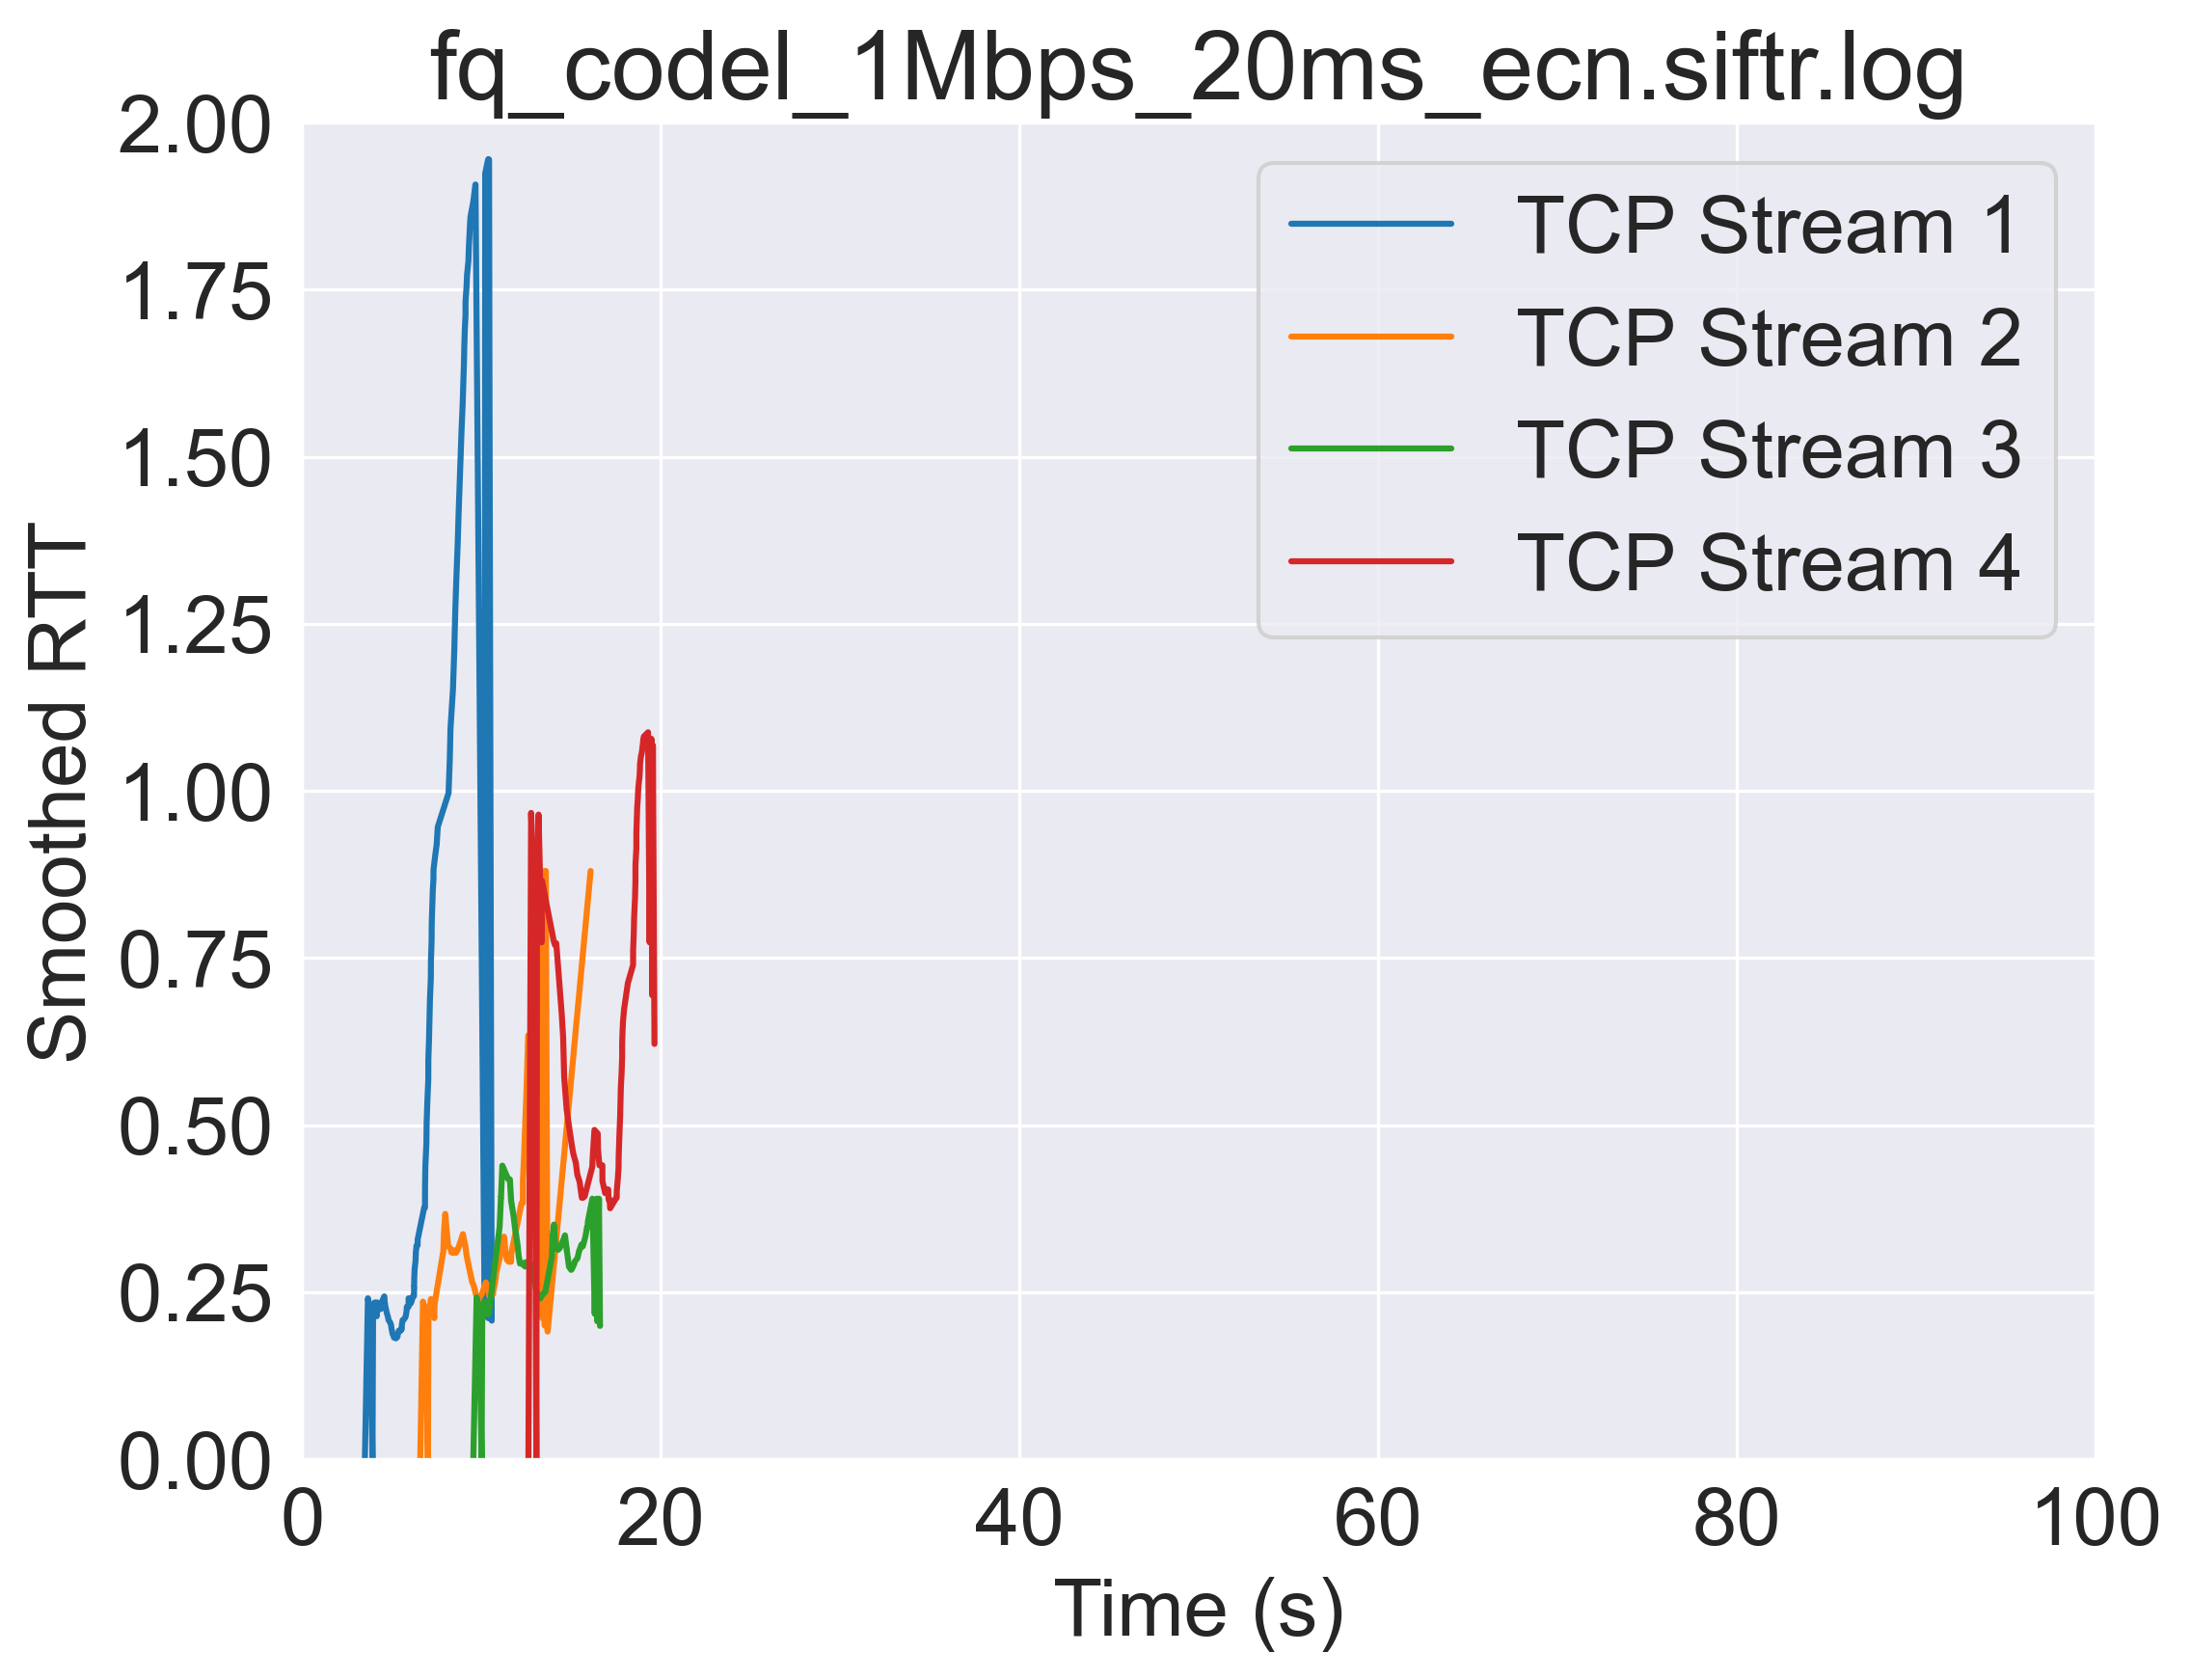

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


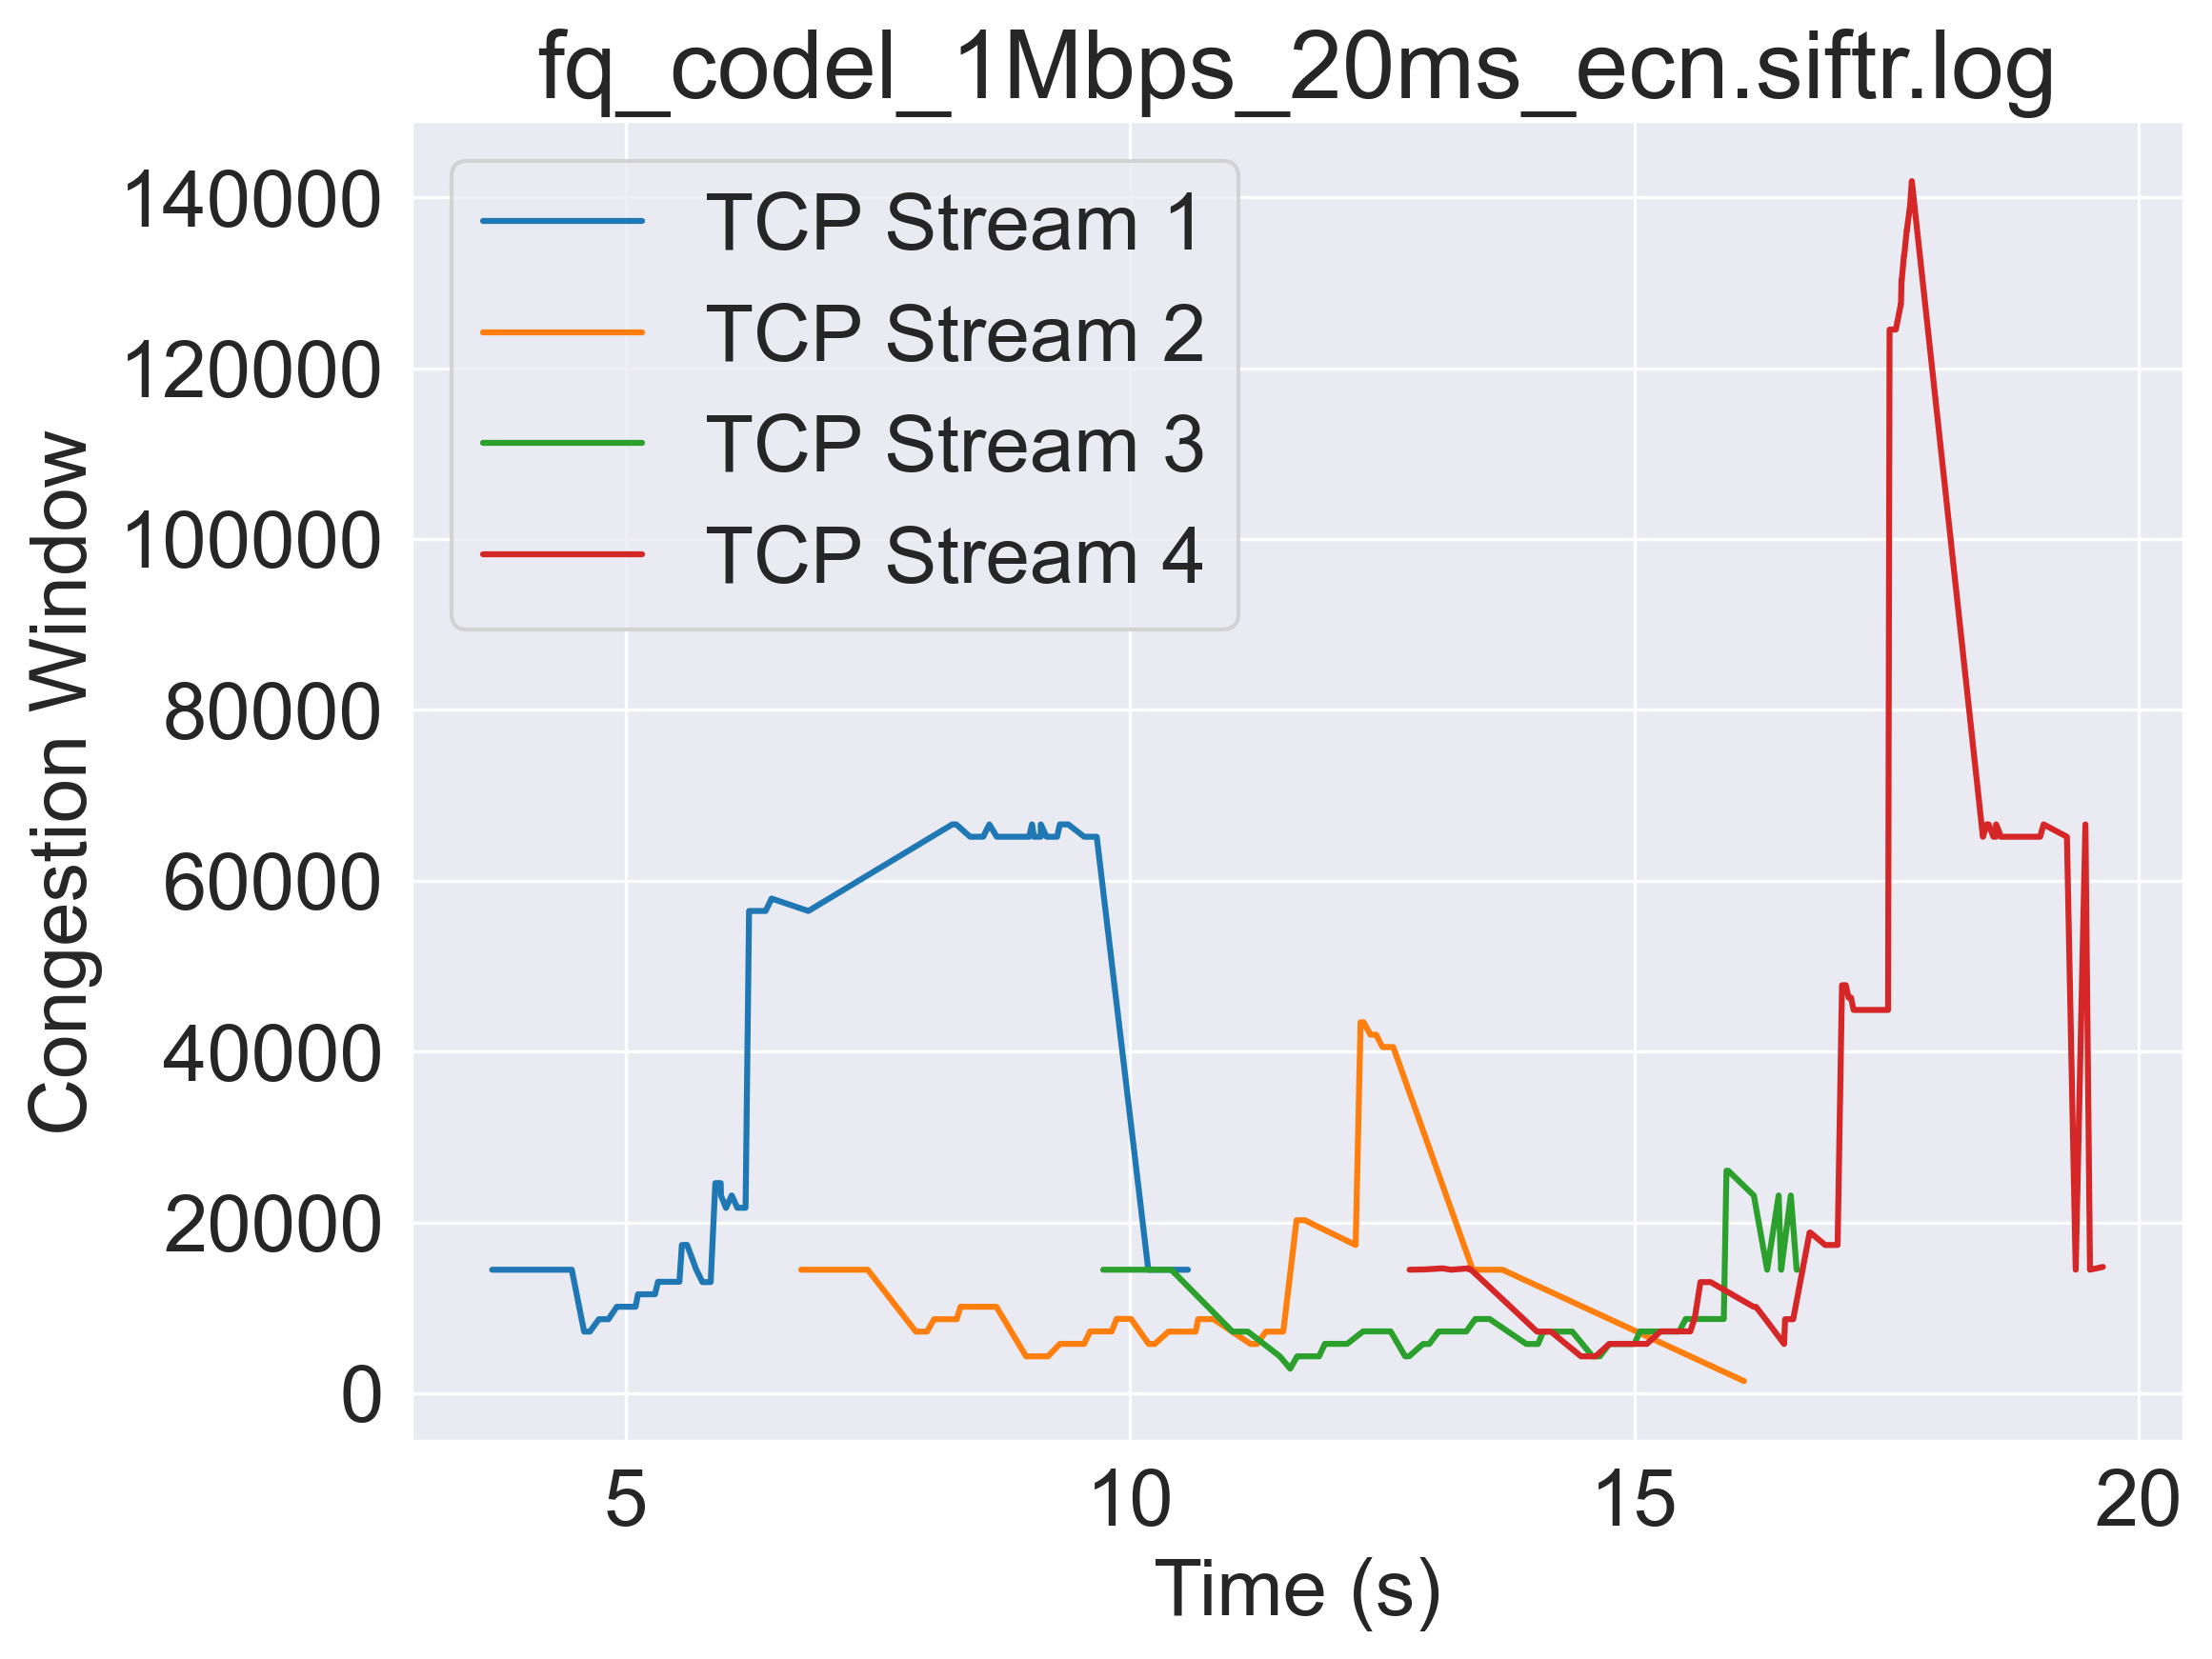

fq_codel_1Mbps_20ms_noecn.siftr.log
count    221.000000
mean       0.247118
std        0.077186
min        0.000000
25%        0.203125
50%        0.212812
75%        0.249375
max        0.437188
Name: SmoothedRTT, dtype: float64
871    0.000000
886    0.437188
889    0.437188
904    0.399062
905    0.399062
Name: SmoothedRTT, dtype: float64
1428    0.34125
1429    0.34125
1438    0.31375
1441    0.31375
1442    0.31375
Name: SmoothedRTT, dtype: float64
Statistics saved to ./stats/fq_codel_1Mbps_20ms_noecn.siftr.log_statistics_results.txt


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


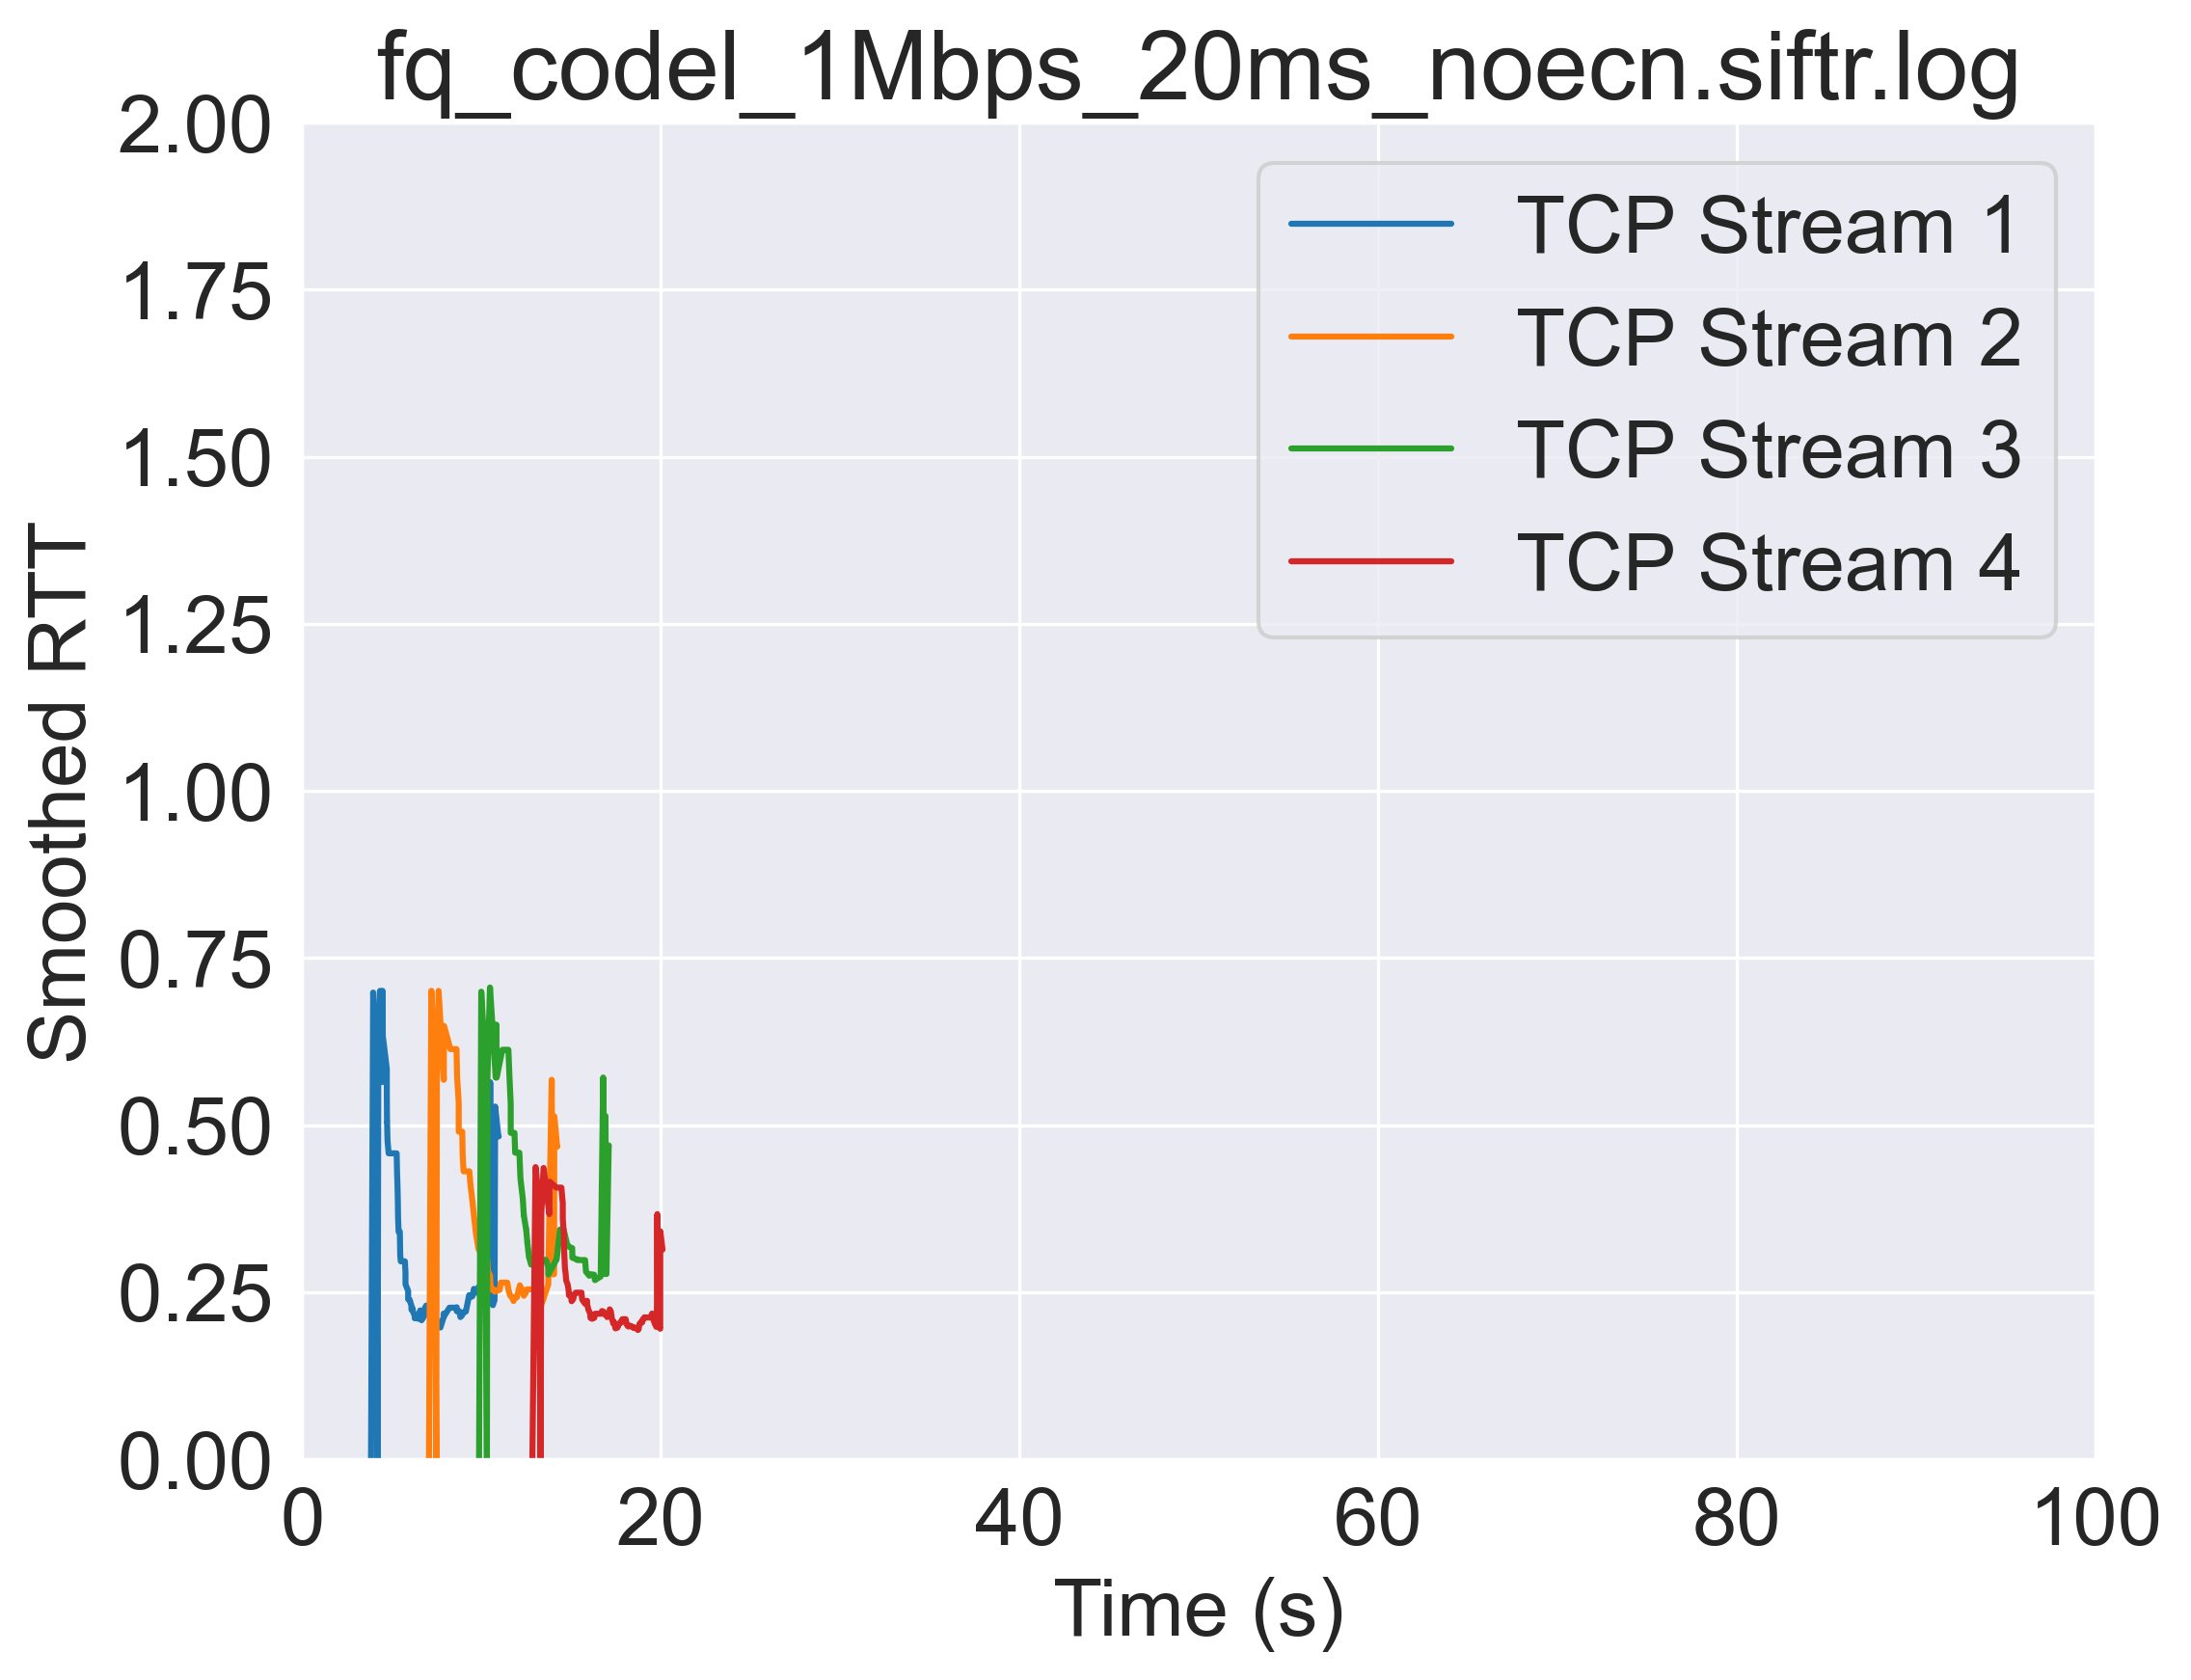

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


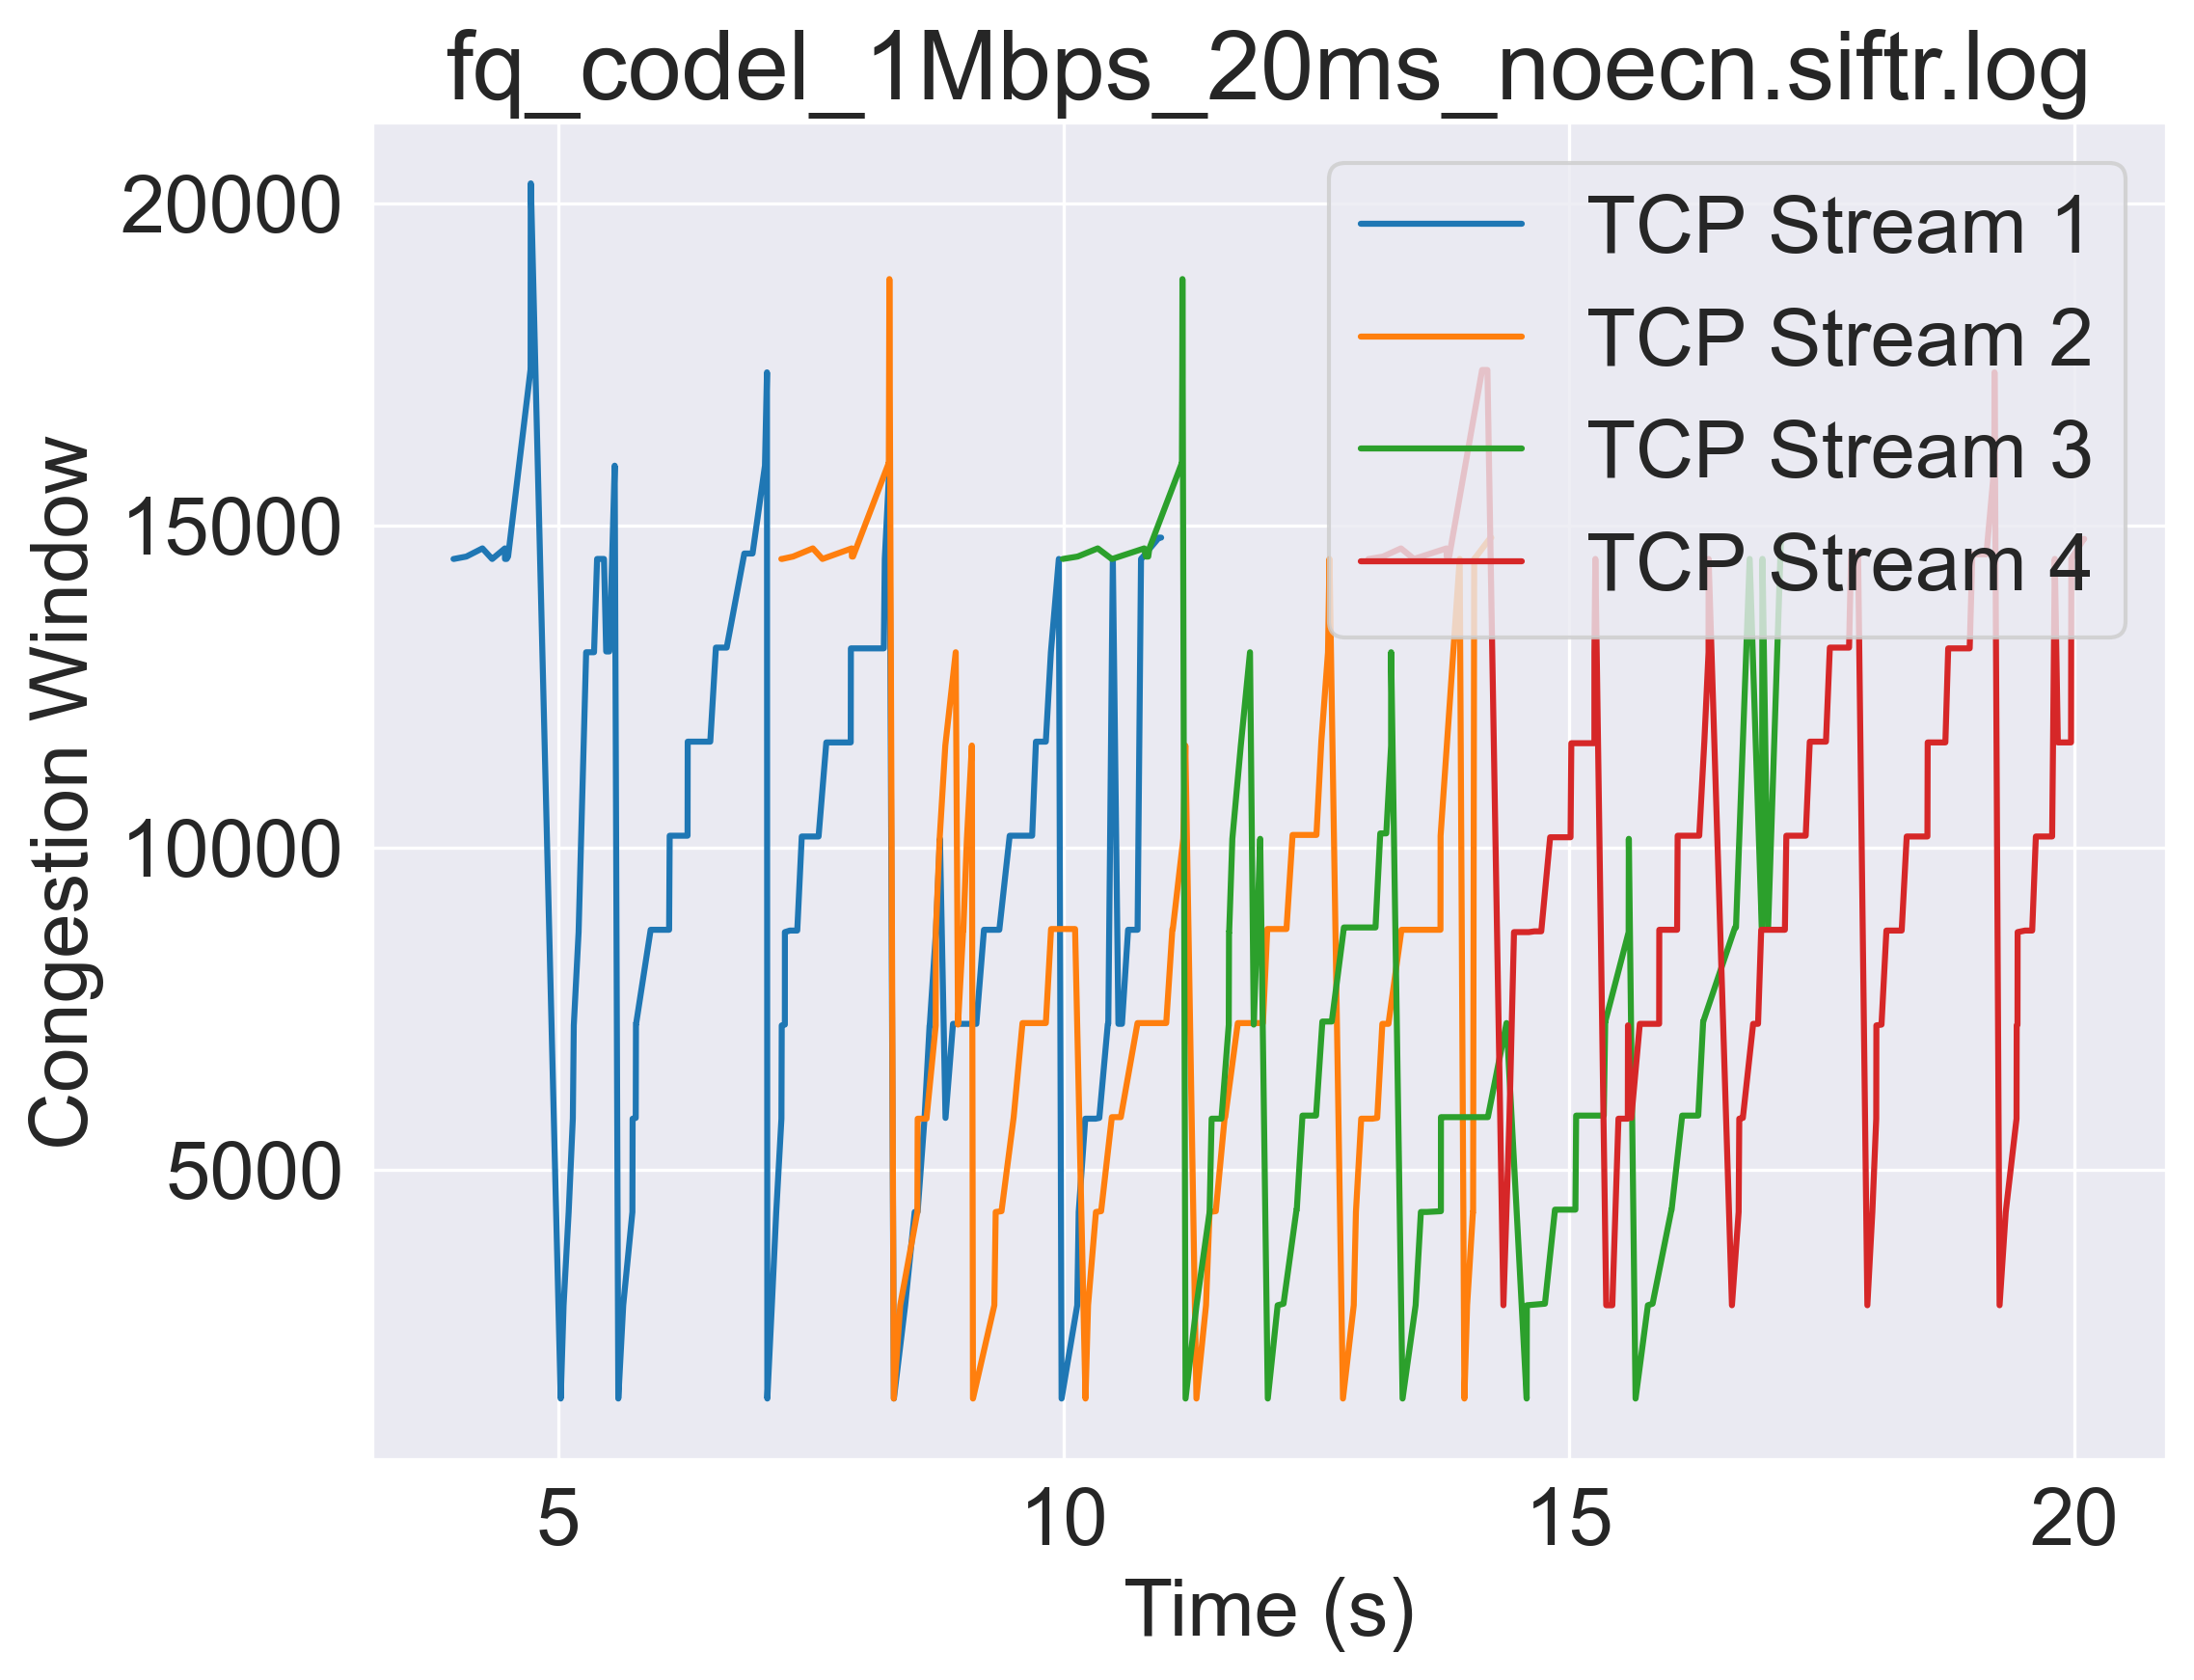

In [9]:
dataframe_list=[]
data_filename_list=[]
data_dict={}
for index in range(len(filenames)):
    # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
    data = []
    with open("./datatest1/"+filenames[index], 'r') as f:
        # store the data
        for line in f:
            tem = re.sub(r'\s', '', line)
            data.append(tem.split(','))
    # remove file line of data
    print(filenames[index])
    data.pop(0)
    data.pop(len(data)-1)

    # define variables from enable_time_secs=1716792031	enable_time_usecs=061770	
    # siftrver=1.2.4 hz=100	tcp_rtt_scale=32	sysname=FreeBSD	sysver=1301000	ipmode=4
    enable_time_secs = 1716792031
    enable_time_usecs = 61770
    siftver = '1.2.4'
    hz = 100
    tcp_rtt_scale = 32
    sysname = 'FreeBSD'
    sysver = 1301000
    ipmode = 4



    df = pd.DataFrame(data, columns=col)

    df=df[df['Direction']=='o']

    # congestion window to int
    df = df.astype({'CongestionWindow': 'int32'})
    
    # Convert 'Time' column to float64 type
    df['Time'] = df['Time'].astype('float64')

    # Subtract the first time entry from all the entries in 'Time' column
    df['Time'] = df['Time'] - df['Time'].iloc[0]



    # remove rows that congestion window bigger than 70000
    # df = df[df['CongestionWindow'].astype(int) < 70000]
    # RTT divide by tcp_rtt_scale * hz
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
    df['SmoothedRTT'] = df['SmoothedRTT'] / (tcp_rtt_scale * hz)
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')

    



    # first path ForeignPort = 5101
    dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

    # second path localip = 5102
    dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

    # third path ForeignPort = 5101
    dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

    # fourth path localip = 5102
    dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
    # data_filename_list.append(filenames[index])
    # dataframe_list.append(dfPath1.copy())
    # data_dict[filenames[index]]=dfPath1.copy()
    print(dfPath4['SmoothedRTT'].describe())
    print(dfPath4['SmoothedRTT'].head(5))
    print(dfPath4['SmoothedRTT'].tail(5))

    # Darker color-blind-friendly palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    # Different line styles and markers
    line_styles = ['-', '--', '-.', ':']
    #line_styles = ['-', '-', '-', '-']
    markers = ['o', 's', '^', 'D']

    


    

    # Plot Smoothed RTT vs Time
    #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
    plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
    sns.set_style("darkgrid")  # Set the style to darkgrid

    if contains_1_or_2(filenames[index]) == 1:
        plt.xlim(0,100)
        plt.ylim(0,2)
    elif contains_1_or_2(filenames[index]) == 2:
        plt.xlim(0,100)
        plt.ylim(0,2)
    
    # plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
    #              color=colors[0], linestyle=line_styles[0])
    # plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
    #              color=colors[1], linestyle=line_styles[1])
    # plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
    #              color=colors[2], linestyle=line_styles[2])
    # plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
    #              color=colors[3], linestyle=line_styles[3])
    # Function to calculate statistics
    def calculate_statistics(df):
        median = df['SmoothedRTT'].median()
        mean = df['SmoothedRTT'].mean()
        q25 = df['SmoothedRTT'].quantile(0.25)
        q75 = df['SmoothedRTT'].quantile(0.75)
        minimum = df['SmoothedRTT'].min()
        maximum = df['SmoothedRTT'].max()
        
        return {
            'Median': median,
            'Mean': mean,
            '25th Percentile': q25,
            '75th Percentile': q75,
            'Minimum': minimum,
            'Maximum': maximum
        }

    # Calculate statistics for each DataFrame
    statistics_dfPath1 = calculate_statistics(dfPath1)
    statistics_dfPath2 = calculate_statistics(dfPath2)
    statistics_dfPath3 = calculate_statistics(dfPath3)
    statistics_dfPath4 = calculate_statistics(dfPath4)

    # Define the filename to save results
    stats_filename = "./stats/"+filenames[index]+'_statistics_results.txt'

    # Function to save statistics to a file
    def save_statistics_to_file(stats_filename, statistics,title):
        with open(stats_filename, 'a') as f:
            f.write("Statistics for "+title+":\n")
            for key, value in statistics.items():
                f.write(f"{key}: {value}\n")
            f.write("\n")

    # Save statistics for each DataFrame to the file
    save_statistics_to_file(stats_filename, statistics_dfPath1, "TCP Stream 1")
    save_statistics_to_file(stats_filename, statistics_dfPath2, "TCP Stream 2")
    save_statistics_to_file(stats_filename, statistics_dfPath3, "TCP Stream 3")
    save_statistics_to_file(stats_filename, statistics_dfPath4, "TCP Stream 4")

    print(f"Statistics saved to {stats_filename}")
    
    plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
                 color=colors[0])
    plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
                 color=colors[1])
    plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
                 color=colors[2])
    plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
                 color=colors[3])
    
    plt.xlabel('Time (s)')
    plt.ylabel('Smoothed RTT')
    plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.png", dpi=300,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.eps", dpi=300,bbox_inches='tight')
    plt.show()

    dfpath1_filtered = remove_outliers_iqr(dfPath1,"CongestionWindow")
    dfpath2_filtered = remove_outliers_iqr(dfPath2,"CongestionWindow")
    dfpath3_filtered = remove_outliers_iqr(dfPath3,"CongestionWindow")
    dfpath4_filtered = remove_outliers_iqr(dfPath4,"CongestionWindow")

    # Plot CWND vs Time
    #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
    plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
    sns.set_style("darkgrid")  # Set the style to darkgrid


    # if contains_1_or_2(filenames[index]) == 1:
    #     plt.xlim(0,100)
    #     plt.ylim(0,140000)
    # elif contains_1_or_2(filenames[index]) == 2:
    #     plt.xlim(0,100)
    #     plt.ylim(0,140000)
    

    
   
    # plt.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1',
    #              color=colors[0], linestyle=line_styles[0])
    # plt.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2',
    #              color=colors[1], linestyle=line_styles[1])
    # plt.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3',
    #              color=colors[2], linestyle=line_styles[2])
    # plt.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4',
    #              color=colors[3], linestyle=line_styles[3])
    

    plt.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1',
                 color=colors[0])
    plt.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2',
                 color=colors[1])
    plt.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3',
                 color=colors[2])
    plt.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4',
                 color=colors[3])
    
    plt.xlabel('Time (s)')
    plt.ylabel('Congestion Window')
    plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_CWND.png", dpi=300,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_CWND.eps", dpi=300,bbox_inches='tight')
    plt.show()
    


In [10]:
# dataframe_list=[]
# data_filename_list=[]
# data_dict={}
# for index in range(len(filenames)):
#     # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
#     data = []
#     with open("./datatest1/"+filenames[index], 'r') as f:
#         # store the data
#         for line in f:
#             tem = re.sub(r'\s', '', line)
#             data.append(tem.split(','))
#     # remove file line of data
#     data.pop(0)
#     data.pop(len(data)-1)

#     # define variables from enable_time_secs=1716792031	enable_time_usecs=061770	
#     # siftrver=1.2.4 hz=100	tcp_rtt_scale=32	sysname=FreeBSD	sysver=1301000	ipmode=4
#     enable_time_secs = 1716792031
#     enable_time_usecs = 61770
#     siftver = '1.2.4'
#     hz = 100
#     tcp_rtt_scale = 32
#     sysname = 'FreeBSD'
#     sysver = 1301000
#     ipmode = 4



#     df = pd.DataFrame(data, columns=col)

#     # congestion window to int
#     df = df.astype({'CongestionWindow': 'int32'})
    
#     # Convert 'Time' column to float64 type
#     df['Time'] = df['Time'].astype('float64')

#     # Subtract the first time entry from all the entries in 'Time' column
#     df['Time'] = df['Time'] - df['Time'].iloc[0]



#     # remove rows that congestion window bigger than 70000
#     # df = df[df['CongestionWindow'].astype(int) < 70000]
#     # RTT divide by tcp_rtt_scale * hz
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
#     df['SmoothedRTT'] = df['SmoothedRTT'] / (tcp_rtt_scale * hz)
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')



#     # first path ForeignPort = 5101
#     dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

#     # second path localip = 5102
#     dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

#     # third path ForeignPort = 5101
#     dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

#     # fourth path localip = 5102
#     dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
#     # data_filename_list.append(filenames[index])
#     # dataframe_list.append(dfPath1.copy())
#     # data_dict[filenames[index]]=dfPath1.copy()
#     print(dfPath4['SmoothedRTT'].describe())
#     print(dfPath4['SmoothedRTT'].head(5))
#     print(dfPath4['SmoothedRTT'].tail(5))


    

#     # Plot Smoothed RTT vs Time
#     plt.figure(figsize=(10, 6))
#     plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1')
#     plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2')
#     plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3')
#     plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Smoothed RTT')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # Plot CWND vs Time
#     plt.figure(figsize=(10, 6))
#     plt.plot(dfPath1['Time'], dfPath1['CongestionWindow'], label='TCP Stream 1')
#     plt.plot(dfPath2['Time'], dfPath2['CongestionWindow'], label='TCP Stream 2')
#     plt.plot(dfPath3['Time'], dfPath3['CongestionWindow'], label='TCP Stream 3')
#     plt.plot(dfPath4['Time'], dfPath4['CongestionWindow'], label='TCP Stream 4')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Congestion Window')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     plt.show()

    
#     break;
    


In [11]:
for i in range(len(col)):
    print(i,end=",")
    print(col[i])


0,Direction
1,Hash
2,Time
3,LocalIP
4,LocalPort
5,ForeignIP
6,ForeignPort
7,SlowStartThreshold
8,CongestionWindow
9,BandwidthControlledWindow
10,SendingWindow
11,ReceiveWindow
12,SendingWindowScalingFactor
13,ReceiveWindowScalingFactor
14,TCPFiniteStateMachine
15,MaximumSegmentSize
16,SmoothedRTT
17,SACKEnabled
18,TCPFlags
19,RetransmissionTimeout
20,SocketSendBufferSize
21,SocketSendBufferBytes
22,SocketReceiveBufferSize
23,SocketReceiveBufferBytes
24,UnacknowledgedBytes
25,ReassemblyQueue
26,Flowid
27,Flowtype
